In [2]:
!pip install -q pydot
!pip install imblearn
!pip install --upgrade scikit-learn

     -------------------------------------- 226.0/226.0 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
     ---------------------------------------- 8.4/8.4 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pydot
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.api.types import is_numeric_dtype
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import seaborn as sns

In [662]:
data_set = pd.read_excel('Base de Datos - Proyecto 2.xlsx')

In [663]:
data_set.head(10)

,checking_balance,months_loan_duration,Fraud,amount,employment_length,installment_rate,personal_status,age,housing,existing_credits,Active,dependents,behavioral (>6m),default,n° children,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,unknown,9.0,no,3074.0,1 - 4 yrs,1.0,single male,33.0,own,2,yes,2,yes,No Bad,2.0,NaN,Diccionario,NaN
1,unknown,21.0,no,5248.0,1 - 4 yrs,1.0,single male,26.0,own,1,yes,1,no,No Bad,5.0,NaN,NaN,NaN
2,1 - 200 DM,NaN,no,2629.0,1 - 4 yrs,2.0,single male,29.0,own,2,yes,1,yes,No Bad,0.0,NaN,checking_balance,NaN
3,< 0 DM,48.0,yes,7685.0,4 - 7 yrs,2.0,female,37.0,rent,1,yes,1,yes,Bad,4.0,NaN,< 0 DM,3.0
4,1 - 200 DM,20.0,no,6468.0,unemployed,1.0,divorced male,60.0,own,1,yes,1,yes,No Bad,1.0,NaN,> 200 DM,2.0
5,1 - 200 DM,24.0,no,1965.0,1 - 4 yrs,4.0,female,42.0,rent,2,yes,1,yes,No Bad,NaN,NaN,1 - 200 DM,1.0
6,1 - 200 DM,48.0,no,3566.0,4 - 7 yrs,4.0,single male,30.0,own,1,yes,1,yes,No Bad,3.0,NaN,unknown,0.0
7,1 - 200 DM,NaN,no,1860.0,unemployed,4.0,single male,34.0,own,2,yes,1,yes,No Bad,5.0,NaN,NaN,NaN
8,unknown,18.0,no,1055.0,0 - 1 yrs,4.0,female,30.0,own,2,yes,1,yes,No Bad,2.0,NaN,employment_length,NaN
9,1 - 200 DM,9.0,no,1437.0,4 - 7 yrs,2.0,single male,29.0,own,1,yes,1,yes,Bad,3.0,NaN,> 7 yrs,4.0


In [664]:
#Reemplazo de valores por los del diccionario
data_set['checking_balance'] = data_set['checking_balance'].replace('< 0 DM','3')
data_set['checking_balance'] = data_set['checking_balance'].replace('> 200 DM','2')
data_set['checking_balance'] = data_set['checking_balance'].replace('1 - 200 DM','1')
data_set['checking_balance'] = data_set['checking_balance'].replace('unknown','0')

data_set['employment_length'] = data_set['employment_length'].replace('> 7 yrs','4')
data_set['employment_length'] = data_set['employment_length'].replace('0 - 1 yrs','3')
data_set['employment_length'] = data_set['employment_length'].replace('1 - 4 yrs','2')
data_set['employment_length'] = data_set['employment_length'].replace('4 - 7 yrs','1')
data_set['employment_length'] = data_set['employment_length'].replace('unemployed','0')

data_set['personal_status'] = data_set['personal_status'].replace('divorced male','3')
data_set['personal_status'] = data_set['personal_status'].replace('female','2')
data_set['personal_status'] = data_set['personal_status'].replace('married male','1')
data_set['personal_status'] = data_set['personal_status'].replace('single male','0')

data_set['housing'] = data_set['housing'].replace('for free','2')
data_set['housing'] = data_set['housing'].replace('own','1')
data_set['housing'] = data_set['housing'].replace('rent','0')

data_set['default'] = data_set['default'].replace('No Bad','0')
data_set['default'] = data_set['default'].replace('Bad','1')

In [665]:
data_set = data_set.loc[data_set['Fraud']=='no']
data_set = data_set.loc[data_set['Active']=='yes']
data_set = data_set.loc[data_set['behavioral (>6m)']=='yes']

In [666]:
#Reemplazamos además los "yes" por 1, y los "no" por 0 en las columnas correspondientes:
data_set['Fraud'] = data_set['Fraud'].replace('yes','1')
data_set['Fraud'] = data_set['Fraud'].replace('no','0')

data_set['Active'] = data_set['Active'].replace('yes','1')
data_set['Active'] = data_set['Active'].replace('no','0')

data_set['behavioral (>6m)'] = data_set['behavioral (>6m)'].replace('yes','1')
data_set['behavioral (>6m)'] = data_set['behavioral (>6m)'].replace('no','0')

In [667]:
data_set

,checking_balance,months_loan_duration,Fraud,amount,employment_length,installment_rate,personal_status,age,housing,existing_credits,Active,dependents,behavioral (>6m),default,n° children,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,0,9.0,0,3074.0,2,1.0,0,33.0,1,2,1,2,1,0,2.0,NaN,Diccionario,NaN
2,1,NaN,0,2629.0,2,2.0,0,29.0,1,2,1,1,1,0,0.0,NaN,checking_balance,NaN
4,1,20.0,0,6468.0,0,1.0,3,60.0,1,1,1,1,1,0,1.0,NaN,> 200 DM,2.0
5,1,24.0,0,1965.0,2,4.0,2,42.0,0,2,1,1,1,0,NaN,NaN,1 - 200 DM,1.0
6,1,48.0,0,3566.0,1,4.0,0,30.0,1,1,1,1,1,0,3.0,NaN,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,24.0,0,4526.0,2,3.0,0,74.0,1,1,1,1,1,0,NaN,NaN,NaN,NaN
796,0,24.0,0,999.0,4,4.0,0,25.0,1,2,1,1,1,0,NaN,NaN,NaN,NaN
797,0,27.0,0,5117.0,1,3.0,0,26.0,1,2,1,1,1,0,4.0,NaN,NaN,NaN
798,0,60.0,0,10144.0,1,2.0,2,21.0,1,1,1,1,1,0,0.0,NaN,NaN,NaN


In [668]:
#Sin embargo, dado que estas columnas solo tienen un dato constante (son binarias y se eliminó 1), se eliminan las columnas
data_set = data_set.drop('Fraud',axis = 1)
data_set = data_set.drop('Active',axis = 1)
data_set = data_set.drop('behavioral (>6m)',axis = 1)

In [669]:
#Eliminamos las columnas del diccionario
data_set = data_set.drop('Unnamed: 15',axis = 1)
data_set = data_set.drop('Unnamed: 16',axis = 1)
data_set = data_set.drop('Unnamed: 17',axis = 1)

In [670]:
data_set

,checking_balance,months_loan_duration,amount,employment_length,installment_rate,personal_status,age,housing,existing_credits,dependents,default,n° children
0,0,9.0,3074.0,2,1.0,0,33.0,1,2,2,0,2.0
2,1,NaN,2629.0,2,2.0,0,29.0,1,2,1,0,0.0
4,1,20.0,6468.0,0,1.0,3,60.0,1,1,1,0,1.0
5,1,24.0,1965.0,2,4.0,2,42.0,0,2,1,0,NaN
6,1,48.0,3566.0,1,4.0,0,30.0,1,1,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,24.0,4526.0,2,3.0,0,74.0,1,1,1,0,NaN
796,0,24.0,999.0,4,4.0,0,25.0,1,2,1,0,NaN
797,0,27.0,5117.0,1,3.0,0,26.0,1,2,1,0,4.0
798,0,60.0,10144.0,1,2.0,2,21.0,1,1,1,0,0.0


In [671]:
#Vemos el formato de las variables
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   checking_balance      664 non-null    object 
 1   months_loan_duration  651 non-null    float64
 2   amount                652 non-null    float64
 3   employment_length     664 non-null    object 
 4   installment_rate      657 non-null    float64
 5   personal_status       664 non-null    object 
 6   age                   656 non-null    float64
 7   housing               664 non-null    object 
 8   existing_credits      664 non-null    int64  
 9   dependents            664 non-null    int64  
 10  default               664 non-null    object 
 11  n° children           454 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 67.4+ KB
None


In [672]:
#Pasamos las variables de tipo texto a uno numérico para poder trabajarlas
data_set['checking_balance'] = data_set['checking_balance'].astype(int)
data_set['employment_length'] = data_set['employment_length'].astype(int)
data_set['personal_status'] = data_set['personal_status'].astype(int)
data_set['housing'] = data_set['housing'].astype(int)
data_set['default'] = data_set['default'].astype(int)

In [673]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   checking_balance      664 non-null    int32  
 1   months_loan_duration  651 non-null    float64
 2   amount                652 non-null    float64
 3   employment_length     664 non-null    int32  
 4   installment_rate      657 non-null    float64
 5   personal_status       664 non-null    int32  
 6   age                   656 non-null    float64
 7   housing               664 non-null    int32  
 8   existing_credits      664 non-null    int64  
 9   dependents            664 non-null    int64  
 10  default               664 non-null    int32  
 11  n° children           454 non-null    float64
dtypes: float64(5), int32(5), int64(2)
memory usage: 54.5 KB
None


En primer lugar se hará el tratamiento a los valores perdidos, pues esto es necesario para el modelo empleado en el tratamiento de los valores extremos.

In [674]:
data_set.isnull().sum()
data_set.isnull().sum() / len(data_set)

nulos = pd.DataFrame({'Recuento de Nulos': data_set.isnull().sum(), 
                      'Proporción de Nulos': round(data_set.isnull().sum() / len(data_set) * 100,1)})
nulos

,Recuento de Nulos,Proporción de Nulos
checking_balance,0,0.0
months_loan_duration,13,2.0
amount,12,1.8
employment_length,0,0.0
installment_rate,7,1.1
personal_status,0,0.0
age,8,1.2
housing,0,0.0
existing_credits,0,0.0
dependents,0,0.0


In [675]:
#Dada la alta proporción de nulos de la variable n° children, la eliminamos de la base:
data_set = data_set.drop('n° children',axis = 1)

In [678]:
#Tratamiento de valores perdidos: Importamos la libraría para ejecutar el modelo
from sklearn.impute import KNNImputer

#Crea un objeto KNNImputer
imputer = KNNImputer(n_neighbors=3)

#Ajusta el imputer a nuestros datos
imputer.fit(data_set)

#Transforma los datos
data_set_imputed = imputer.transform(data_set)

#Convierte de nuevo al DataFrame
data_set = pd.DataFrame(data_set_imputed, columns=data_set.columns)
data_set

,checking_balance,months_loan_duration,amount,employment_length,installment_rate,personal_status,age,housing,existing_credits,dependents,default
0,0.0,9.0,3074.0,2.0,1.0,0.0,33.0,1.0,2.0,2.0,0.0
1,1.0,25.0,2629.0,2.0,2.0,0.0,29.0,1.0,2.0,1.0,0.0
2,1.0,20.0,6468.0,0.0,1.0,3.0,60.0,1.0,1.0,1.0,0.0
3,1.0,24.0,1965.0,2.0,4.0,2.0,42.0,0.0,2.0,1.0,0.0
4,1.0,48.0,3566.0,1.0,4.0,0.0,30.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
659,0.0,24.0,4526.0,2.0,3.0,0.0,74.0,1.0,1.0,1.0,0.0
660,0.0,24.0,999.0,4.0,4.0,0.0,25.0,1.0,2.0,1.0,0.0
661,0.0,27.0,5117.0,1.0,3.0,0.0,26.0,1.0,2.0,1.0,0.0
662,0.0,60.0,10144.0,1.0,2.0,2.0,21.0,1.0,1.0,1.0,0.0


In [679]:
#Volvemos a observar los nulos para rectificar que ya no hay
nulos = pd.DataFrame({'Recuento de Nulos': data_set.isnull().sum(), 
                      'Proporción de Nulos': round(data_set.isnull().sum() / len(data_set) * 100,1)})
nulos

,Recuento de Nulos,Proporción de Nulos
checking_balance,0,0.0
months_loan_duration,0,0.0
amount,0,0.0
employment_length,0,0.0
installment_rate,0,0.0
personal_status,0,0.0
age,0,0.0
housing,0,0.0
existing_credits,0,0.0
dependents,0,0.0


In [680]:
#Seleccionamos las columnas no categóricas para ver outliers:
columnas_num = ['months_loan_duration', 'amount', 'installment_rate', 'age']
columnas_numéricas = data_set[columnas_num]

#Calcular la media y la mediana solo para las columnas
media = columnas_numéricas.mean()
mediana = columnas_numéricas.median()
std_dev = columnas_numéricas.std()
cambio = (media - mediana) / media * 100

#Creamos un DataFrame con las estadísticas descriptivas
estadisticas = pd.concat([media, mediana, std_dev, cambio], axis=1)
estadisticas.columns = ['Media', 'Mediana', 'Desviación Estándar', 'Cambio porcentual']

#Formato y estilo a las estadísticas
estadisticas_estilizadas = estadisticas.style.format("{:.1f}").highlight_null(null_color='lightgrey')

Estadísticas Descriptivas:


,Media,Mediana,Desviación Estándar,Cambio porcentual
months_loan_duration,20.6,18.0,12.1,12.7
amount,3186.2,2295.5,2722.6,28.0
installment_rate,3.0,3.0,1.1,-1.6
age,35.4,33.0,11.3,6.9


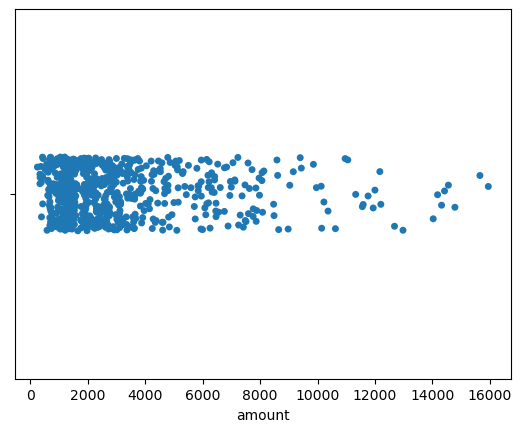

In [682]:
#Vemos que amount tiene una variación alta (>15%), por lo que la análizamos gráficamente:
sn.stripplot(x='amount', data=data_set) 
plt.show()

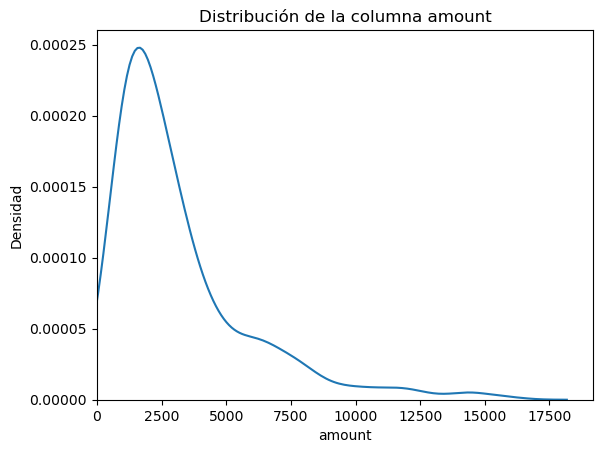

In [685]:
sns.kdeplot(data=data_set['amount'])
plt.xlabel('amount')
plt.ylabel('Densidad')
plt.title('Distribución de la columna {}'.format('amount'))

plt.xlim(0)
plt.show()


In [684]:
#Vemos qué variables son las que guardan mayor relación con 'amount'
correlation_matrix = data_set.corr()
amount_correlations = correlation_matrix['amount']
print(amount_correlations)

sns.kdeplot(data=data_set['amount'])
plt.xlabel('amount')
plt.ylabel('Densidad')
plt.title('Distribución de la columna {}'.format('amount'))

plt.xlim(0)
plt.show()


checking_balance       -0.021932
months_loan_duration    0.611443
amount                  1.000000
employment_length      -0.060558
installment_rate       -0.230676
personal_status        -0.144979
age                     0.029170
housing                 0.093703
existing_credits        0.036809
dependents             -0.011617
default                 0.157290
Name: amount, dtype: float64


In [686]:
#Determinamos el límite que determina desde qué valor se considera outlier
lim_sup = media + 3 * std_dev
lim_sup

months_loan_duration       56.925272
amount                  11353.906583
installment_rate            6.338437
age                        69.250895
dtype: float64

In [688]:
#Ejecutamos el modelo predictivo, comenzando por importar la librería
from sklearn.ensemble import RandomForestRegressor

#Divide el dataframe en dos: una parte con los outliers y otra sin ellos
df_no_outliers2 = data_set[data_set['amount'] <= lim_sup['amount']].copy()
df_outliers2 = data_set[data_set['amount'] > lim_sup['amount']].copy()

#Definimos las variables con mayor correlación a la que buscamos predecir
features2 = ['months_loan_duration', 'default', 'housing']

#Entrena el modelo RandomForest con los datos sin outliers
model2 = RandomForestRegressor()
model2.fit(df_no_outliers2[features2], df_no_outliers2['amount'])

#Usa el modelo para predecir los valores de 'amount' para los outliers
predictions2 = model2.predict(df_outliers2[features2])

#Reemplaza los valores originales de 'amount' en df_outliers con las predicciones
df_outliers2.loc[:, 'amount'] = predictions2

#Combina df_no_outliers y df_outliers de nuevo en un solo dataframe
processed_data_set2 = pd.concat([df_no_outliers2, df_outliers2])


In [692]:
data_set = processed_data_set2

In [695]:
#Volvemos a ver el cambio porcentual entre media y mediana, solo para ver que bajaron
columnas_num = ['months_loan_duration', 'amount', 'installment_rate', 'age']
columnas_numéricas = data_set[columnas_num]

media = columnas_numéricas.mean()
mediana = columnas_numéricas.median()
std_dev = columnas_numéricas.std()
cambio = (media - mediana) / media * 100

estadisticas = pd.concat([media, mediana, std_dev, cambio], axis=1)
estadisticas.columns = ['Media', 'Mediana', 'Desviación Estándar', 'Cambio porcentual']

estadisticas_estilizadas = estadisticas.style.format("{:.1f}").highlight_null(null_color='lightgrey')

print("Estadísticas Descriptivas:")
display(estadisticas_estilizadas)

Estadísticas Descriptivas:


,Media,Mediana,Desviación Estándar,Cambio porcentual
months_loan_duration,20.6,18.0,12.1,12.7
amount,2977.6,2286.0,2211.0,23.2
installment_rate,3.0,3.0,1.1,-1.6
age,35.4,33.0,11.3,6.9


In [696]:
#Nuestro data set final
data_set

,checking_balance,months_loan_duration,amount,employment_length,installment_rate,personal_status,age,housing,existing_credits,dependents,default
0,0.0,9.0,3074.000000,2.0,1.0,0.0,33.0,1.0,2.0,2.0,0.0
1,1.0,25.0,2629.000000,2.0,2.0,0.0,29.0,1.0,2.0,1.0,0.0
2,1.0,20.0,6468.000000,0.0,1.0,3.0,60.0,1.0,1.0,1.0,0.0
3,1.0,24.0,1965.000000,2.0,4.0,2.0,42.0,0.0,2.0,1.0,0.0
4,1.0,48.0,3566.000000,1.0,4.0,0.0,30.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
405,3.0,39.0,7157.078290,1.0,4.0,0.0,30.0,1.0,2.0,1.0,0.0
426,1.0,48.0,5486.538126,2.0,2.0,0.0,48.0,1.0,1.0,1.0,0.0
495,3.0,30.0,3742.161430,3.0,1.0,3.0,34.0,1.0,1.0,1.0,1.0
642,1.0,24.0,2069.771580,2.0,1.0,2.0,23.0,0.0,2.0,1.0,1.0


In [698]:
#Exportamos la base limpia para empezar a trabajarla
data_set.to_excel('base_limpia.xlsx', index=False)